In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math

$\textrm{Function to plot the PPI downstream of a LiDAR measurement campaign considering the azimuth and range, as well as the elevation angle of} \\
\textrm{the device (above the nacelle of the turbine).}$

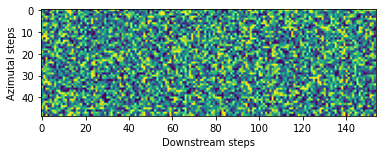

In [76]:
# Matrix of velocities
azimutal_range = 49 
lidar_range = 800 
downstream_step = 154
azimutal_step = 1
first_measurement = 10
ur_min = 3
ur_max = 10
lidar_range_vector = np.linspace(first_measurement,lidar_range,downstream_step) 
azimuth = np.arange(-(azimutal_range//2+1-1),(azimutal_range//2+1),azimutal_step) 
z = np.random.randint(ur_min,ur_max,size=(azimutal_range,downstream_step))
plt.imshow(z)
plt.xlabel('Downstream steps')
plt.ylabel('Azimutal steps')
plt.show()

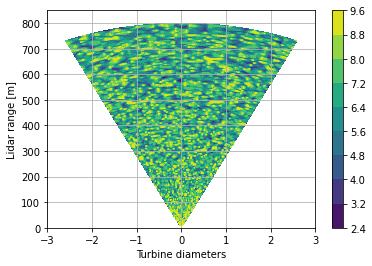

In [87]:
def pol2cart(rad, theta, phi):
    x = rad * np.sin(theta)*np.sin(phi) 
    y = rad * np.cos(theta)*np.sin(phi) 
    return(x, y)
D = 126 # Rotor diameter 
elev = 0
azi = np.around(np.radians(azimuth),2)
elev = np.around(np.radians(90-elev),2)
x = np.zeros((azimutal_range,downstream_step))
y = np.zeros((azimutal_range,downstream_step))
for k in range(len(lidar_range_vector)): 
    for j in range(len(azi)):
        cart = pol2cart(lidar_range_vector[k], azi[j],elev)
        x[j,k] = cart[0]
        x[j,k] = (x[j,k])/D
        y[j,k] = cart[1]
w = plt.contourf(x, y, z)
plt.colorbar(w)
plt.xlim(-3,3)
plt.ylim(0,lidar_range+50)
plt.xlabel('Turbine diameters')
plt.ylabel('Lidar range [m]')
plt.grid()
plt.show()